# Statistical Inference

In this notebook we will be looking if a relationship exists between variables using statistical methods.

## Hypothesis Tests

Hypothesis tests are tests which determines whether there is a relationship between variables. The *null hypothesis* is defined as:

$H_0: \text{There is no relationship between X and y}$

The *alternative hypothesis* is defined as:

$H_{\alpha}: \text{There is some relationship between X and y}$

For simple linear regression this coincides with testing whether $\theta_1=0$ because if $\theta_1$ is 0 then there is no linear relation and X doesn't change with different y.

## t-statistic

In practice we want to how know confident we should be that $\theta_1=0$. This can be done using the *t-statistic* which is defined as:

\begin{equation*}
t = \frac{\theta_1-0}{\text{SE}(\theta_1)}
\end{equation*}

This is essentially how many standard deviations that $\theta_1$ is from 0. 

## p-value

The p value is simply the probability of observing a value larger than |t| which can be found using the area under a normal distribution of mean 0 and standard deviation of 1. If the p-value is small then it is unlikely for there to be a relationship between the predictor and responder due to chance. This is called rejecting the null hypothesis. This is usually done when p<1% or p<5%. 

Now lets do a hypothesis test for [Simple Linear Regression](https://github.com/AlbinFranzen/Machine-Learning-Portfolio/blob/master/ML%20algorithms%20from%20scratch/Supervised%20Learning/Regression/Simple%20Linear%20Regression.ipynb):

In [1]:
import numpy as np
np.random.seed(42)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [42]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

lin_reg = LinearRegression() #apply model and make predictions
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
thetas = np.array([lin_reg.intercept_,lin_reg.coef_]) #get thetas

X_b = np.c_[ np.ones(( 100, 1)), X]  
sigma_squared = 1/(len(y)-2)*((y-y_pred)**2).sum() 
var_cov_matrix = sigma_squared * np.linalg.inv(X_b.T.dot(X_b)) 
standard_errors = np.sqrt(np.diagonal(var_cov_matrix)).reshape(-1,1) #get standard errors

t_stats = np.divide(thetas,standard_errors) #get t-statistic

distributer = lambda x: 1-stats.norm.cdf(x)
vfunc = np.vectorize(distributer)
p_values = vfunc(t_stats) #get p-values

In [69]:
import pandas as pd

df = pd.DataFrame(np.concatenate((thetas, standard_errors, t_stats, p_values),axis=1), 
                  columns=['Coefficient','Standard Error','t-statistic','p_value'])
df.style.hide_index()

Coefficient,Standard Error,t-statistic,p_value
4.215096,0.170287,24.752952,0.000000
2.770113,0.153247,18.076100,0.000000


Here we can see there is a very high probability that there is a relationship between x and y in this example which can be seen below:

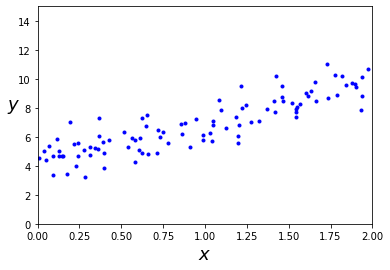

In [70]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## F-statistic

The t-statistic can be used to determine whether a single variable is statistically significant, the F-statistic determines whether a group of variables are statistically significant. 